In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau

import tensorflow as tf
import random as rn
import cv2
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [7]:
lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir('C:\\Users\\chinm\\OneDrive\\Documents\\Internship\\PRODIGY_ML_04\\leapGestRecog\\00\\'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1

x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0

for i in range(0, 10):
    for j in os.listdir('C:\\Users\\chinm\\OneDrive\\Documents\\Internship\\PRODIGY_ML_04\\leapGestRecog\\0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('C:\\Users\\chinm\\OneDrive\\Documents\\Internship\\PRODIGY_ML_04\\leapGestRecog\\0' + str(i) + '/' + j + '/'):
                path = 'C:\\Users\\chinm\\OneDrive\\Documents\\Internship\\PRODIGY_ML_04\\leapGestRecog\\0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1

            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

In [8]:
for i in range(10):  # Loop over the ten top-level folders
    folder_path = f'/home/chinmay/Documents/Internship/TASK4/leapGestRecog/0{i}/'
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])
    print(f"Total files in {folder_path}: {total_files}")

Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/00/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/01/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/02/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/03/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/04/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/05/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/06/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/07/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/08/: 0
Total files in /home/chinmay/Documents/Internship/TASK4/leapGestRecog/09/: 0


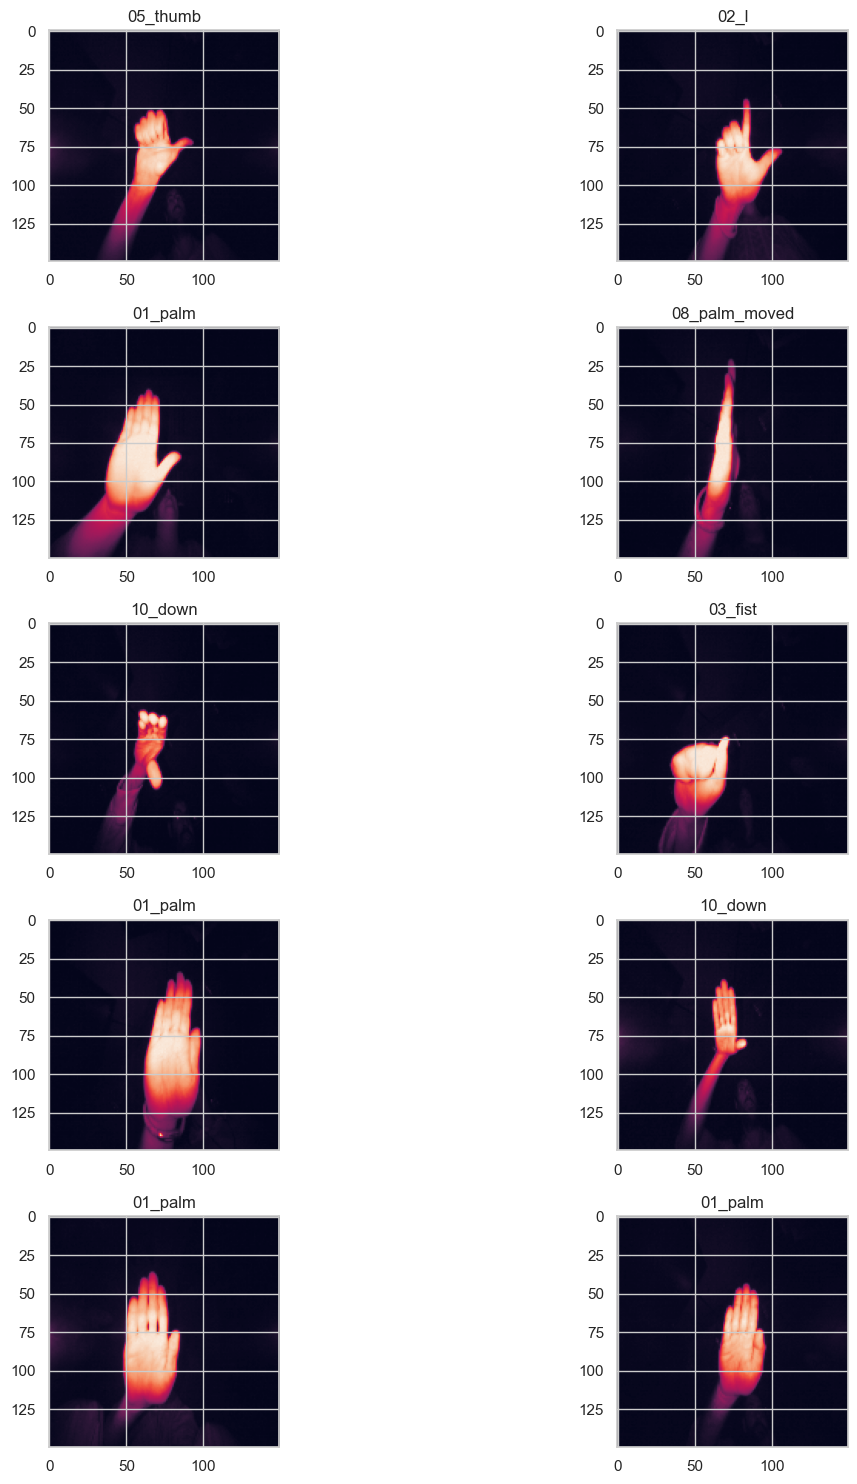

In [9]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        l = rn.randint(0, len(y_data))
        ax[i, j].imshow(x_data[l])
        ax[i, j].set_title(reverselookup[y_data[l, 0]])

plt.tight_layout()

In [10]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [11]:
batch_size=128
epochs=10

In [12]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [13]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

In [15]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/10
118/118 [==============================] - ETA: 0s - loss: 0.3352 - accuracy: 0.8897
Epoch 1: val_loss improved from inf to 0.00639, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 188s 2s/step - loss: 0.3352 - accuracy: 0.8897 - val_loss: 0.0064 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 2/10
118/118 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9980
Epoch 2: val_loss improved from 0.00639 to 0.00260, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 181s 2s/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0026 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 3/10
118/118 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9977
Epoch 3: val_loss improved from 0.00260 to 0.00165, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 190s 2s/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0016 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 4/10
118/118 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 4: val_loss did not improve from 0.00165
118/118 [==============================] - 183s 2s/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 5/10
118/118 [==============================] - ETA: 0s - loss: 8.7029e-04 - accuracy: 0.9997
Epoch 5: val_loss did not improve from 0.00165
118/118 [==============================] - 186s 2s/step - loss: 8.7029e-04 - accuracy: 0.9997 - val_loss: 0.0134 - val_accuracy: 0.9968 - lr: 0.0010
Epoch 6/10
118/118 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9963
Epoch 6: val_loss did not improve from 0.00165

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
118/118 [==============================] - 183s 2s

INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 183s 2s/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 8.0497e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 8/10
118/118 [==============================] - ETA: 0s - loss: 1.4245e-04 - accuracy: 1.0000
Epoch 8: val_loss improved from 0.00080 to 0.00069, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 187s 2s/step - loss: 1.4245e-04 - accuracy: 1.0000 - val_loss: 6.8771e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 9/10
118/118 [==============================] - ETA: 0s - loss: 8.4526e-05 - accuracy: 1.0000
Epoch 9: val_loss improved from 0.00069 to 0.00063, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 184s 2s/step - loss: 8.4526e-05 - accuracy: 1.0000 - val_loss: 6.2859e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 10/10
118/118 [==============================] - ETA: 0s - loss: 6.3703e-05 - accuracy: 1.0000
Epoch 10: val_loss improved from 0.00063 to 0.00058, saving model to .\base.model
INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


118/118 [==============================] - 186s 2s/step - loss: 6.3703e-05 - accuracy: 1.0000 - val_loss: 5.7900e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04


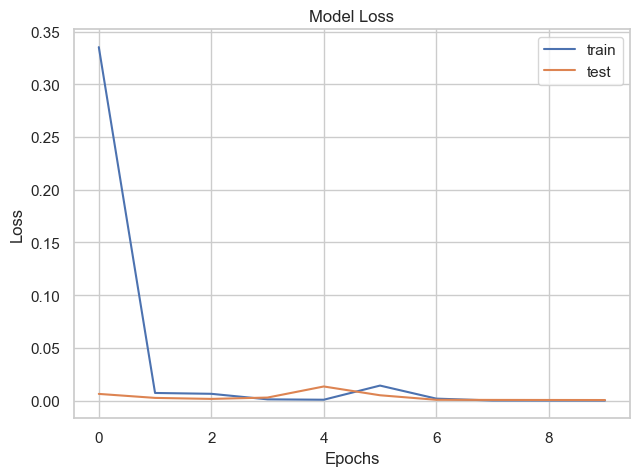

In [16]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

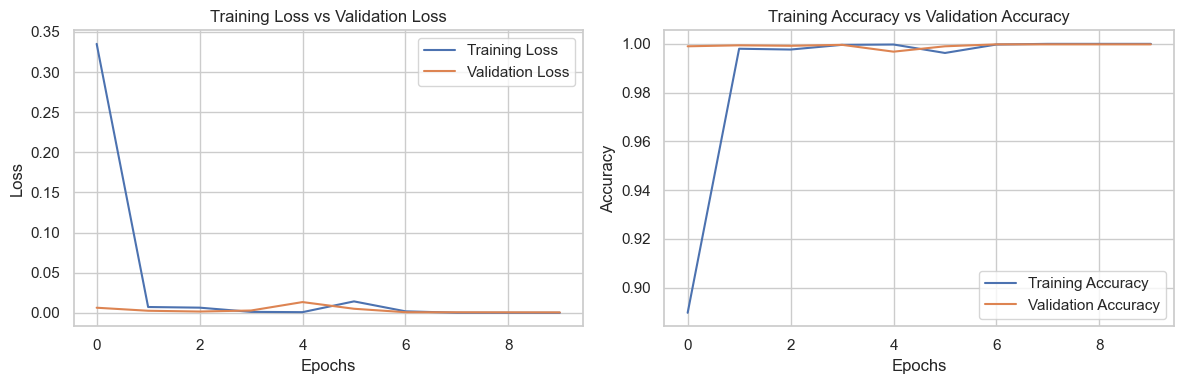

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 148ms/step


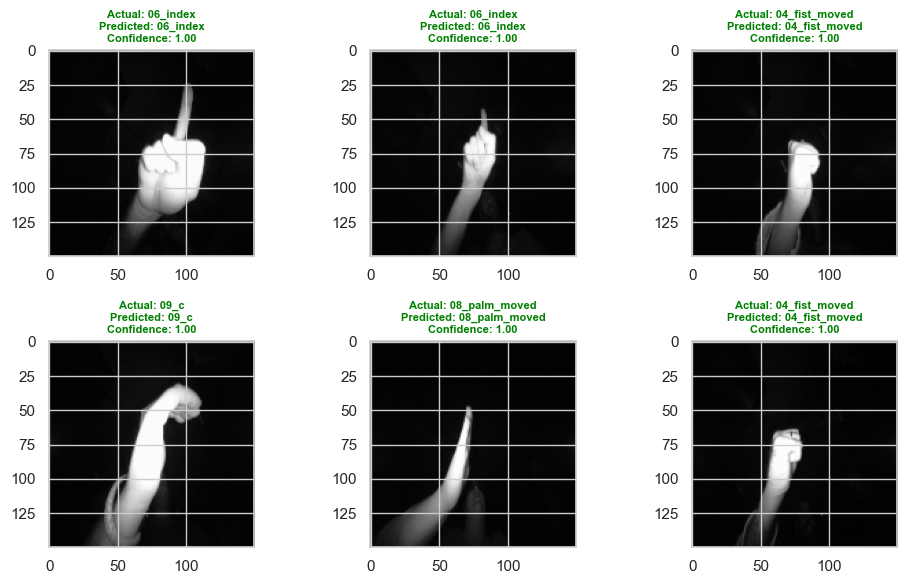

In [18]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Assuming you have a function to reverse lookup the class indices
def reverse_lookup(index):
    return reverselookup[index]

# Select random samples from the test set
num_samples_to_visualize = 6
random_indices = random.sample(range(len(x_test)), num_samples_to_visualize)
x_random_samples = x_test[random_indices]
y_random_labels = y_test[random_indices]  # Assuming y_test contains the true labels

# Make predictions on the randomly selected test samples
predictions_random = model.predict(x_random_samples)

# Visualize predictions for the randomly selected test samples in 2 rows
num_rows = 2
num_cols = num_samples_to_visualize // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        # Plot the original image
        axes[i, j].imshow(x_random_samples[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

        # Print the confidence score in bold black color
        predicted_class = np.argmax(predictions_random[index])
        actual_class = np.argmax(y_random_labels[index])
        confidence = predictions_random[index][predicted_class]

        title_color = 'green' if predicted_class == actual_class else 'red'
        axes[i, j].set_title(f'Actual: {reverse_lookup(actual_class)}\nPredicted: {reverse_lookup(predicted_class)}\nConfidence: {confidence:.2f}', color=title_color, backgroundcolor='white', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

157/157 [==============================] - 13s 80ms/step


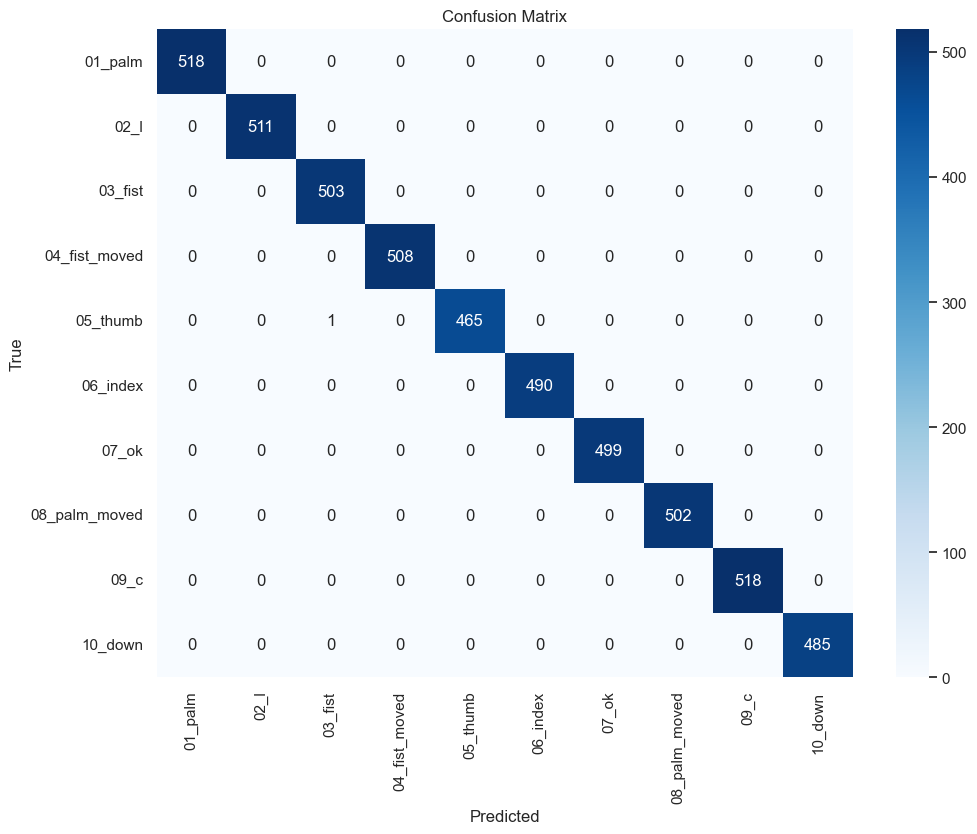

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=reverselookup.values(),
            yticklabels=reverselookup.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()